# Preprocessing

Imports

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
import tensorflow        as tf

Importing Drive and unzipinig the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#!wget https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/5699a1d8-d1b6-45db-bb92-b61051445347/file_downloaded

!unzip drive/MyDrive/Eye/OCT_20

Streaming output truncated to the last 5000 lines.
  inflating: OCT_20/train/NORMAL/NORMAL-1045896-1.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1045896-2.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1045896-3.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1045896-4.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-1.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-2.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-3.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-4.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-5.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-6.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-7.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047298-8.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047578-1.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047578-2.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1047578-3.jpeg  
  inflating: OCT_20/train/NORMAL/NORMAL-1052624-1.jpeg  
  inflating: OCT_20/train/NORMAL/NORM

Determining the batch size

In [ ]:
batch_size = 8

Defining the data generators

In [ ]:
DME_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

Normal_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

CNV_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

DRUSSEN_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

In [ ]:
DME_data = DME_datagen.flow_from_directory(
    'OCT_20/train/DMED',
    target_size = (256,256),
    batch_size  = batch_size * 3,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 2271 images belonging to 1 classes.


In [ ]:
Normal_data = Normal_datagen.flow_from_directory(
    'OCT_20/train/NORMALD',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 5263 images belonging to 1 classes.


In [ ]:
CNV_data = CNV_datagen.flow_from_directory(
    'OCT_20/train/CNVD',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 7481 images belonging to 1 classes.


In [ ]:
DRUSSEN_data = DRUSSEN_datagen.flow_from_directory(
    'OCT_20/train/DRUSEND',
    target_size = (256,256),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 1723 images belonging to 1 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255
)

test_data = test_datagen.flow_from_directory(
    'OCT_20/test',
    target_size = (256,256),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    classes = ['DME', 'OTHER']
)

Found 1000 images belonging to 2 classes.


#Building the Model

Defining the Custom Activation Function

In [ ]:
# custom activation function
def custom_activation(output):
  logexpsum = tf.keras.backend.sum(tf.keras.backend.exp(output), axis=-1, keepdims=True)
  result    = logexpsum / (logexpsum + 1.0)

  return result

Defining Discriminator and the Classification model

In [ ]:
def define_discriminator(in_shape=(256,256,1), n_classes=2):
  in_image = tf.keras.layers.Input(shape=in_shape)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(in_image)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)

  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.1)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)

  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  #fe = tf.keras.layers.Dropout(0.1)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)

  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.1)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)

  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Flatten()(fe)
  #fe = tf.keras.layers.Dropout(0.1)(fe)
  fe = tf.keras.layers.Dense(n_classes)(fe)

  c_out_layer = tf.keras.layers.Activation("softmax")(fe)
  c_model     = tf.keras.models.Model(in_image, c_out_layer)

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.001, 50, 0.96, staircase=True, name=None)
  c_model.compile(loss = "categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate =lr_schedule,  beta_1 = 0.5,) , metrics = ["accuracy"])

  #tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2)

  d_out_layer = tf.keras.layers.Lambda(custom_activation)(fe)
  d_model     = tf.keras.models.Model(in_image, d_out_layer)
  d_model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule, beta_1 = 0.5))
  return d_model, c_model

Defining the Generator

In [ ]:
def define_generator(latent_dim):
  in_lat  = tf.keras.layers.Input(shape=(latent_dim,))
  n_nodes = 128 * 8 * 8

  gen = tf.keras.layers.Dense(n_nodes)(in_lat)

  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)
  gen = tf.keras.layers.Reshape((8, 8, 128))(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)

  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)

  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)

  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)

  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)

  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  out_layer = tf.keras.layers.Conv2D(1, (7,7), activation = "sigmoid", padding = "same")(gen)

  model = tf.keras.models.Model(in_lat, out_layer)
  return model

Defining GAN

In [ ]:
def define_gan(g_model, d_model):
  d_model.trainable = False

  gan_output = d_model(g_model.output)
  model      = tf.keras.models.Model(g_model.input, gan_output)
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay( 0.001, 50, 0.96, staircase=True, name=None)
  opt        = tf.keras.optimizers.Adam(learning_rate = lr_schedule, beta_1 = 0.5)
  model.compile(loss="binary_crossentropy", optimizer=opt)

  return model

How to generate real samples

In [ ]:
def generate_real_samples():
  X_DME     = DME_data.next()
  Y_DME     = np.array([1,0] * X_DME.shape[0]).reshape(X_DME.shape[0], -1)
  X_Normal  = Normal_data.next()
  Y_Normal  = np.array([0,1] * X_Normal.shape[0]).reshape(X_Normal.shape[0], -1)
  X_CNV     = CNV_data.next()
  Y_CNV     = np.array([0,1] * X_CNV.shape[0]).reshape(X_CNV.shape[0], -1)
  X_DRUSSEN = DRUSSEN_data.next()
  Y_DRUSSEN = np.array([0,1] * X_DRUSSEN.shape[0]).reshape(X_DRUSSEN.shape[0], -1)

  X       = np.concatenate([X_DME, X_Normal, X_CNV, X_DRUSSEN])
  labels  = np.concatenate([Y_DME, Y_Normal, Y_CNV, Y_DRUSSEN])
  y       = np.ones((X.shape[0], 1))

  return [X, labels], y

How to generate fake samples

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  z_input = np.random.randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim)
  return z_input

def generate_fake_samples(generator, latent_dim, n_samples):
  z_input = generate_latent_points(latent_dim, n_samples)
  images  = generator.predict(z_input)
  y       = np.zeros((n_samples, 1))
  return images, y

#Training the Model

Defining the train function

In [ ]:
def train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs , batch_size):
  bat_per_epo = int(16738 / (4 * batch_size))

  for i in range(bat_per_epo * n_epochs):
    [Xsup_real, ysup_real], y_real = generate_real_samples()
    c_loss, c_acc                  = c_model.train_on_batch(Xsup_real, ysup_real)

    d_loss1        = d_model.train_on_batch(Xsup_real, y_real)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, 4 * batch_size)
    d_loss2        = d_model.train_on_batch(X_fake, y_fake)

    X_gan, y_gan = generate_latent_points(latent_dim, 4 * batch_size), np.ones((4 * batch_size, 1))
    g_loss       = gan_model.train_on_batch(X_gan, y_gan)

    print(">%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]" % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))

  return c_model.evaluate(test_data)

Defining the models and latent dimension

In [ ]:
latent_dim = 100

d_model, c_model = define_discriminator()
g_model          = define_generator(latent_dim)
gan_model        = define_gan(g_model, d_model)

Loading model weights

In [ ]:
d_model.load_weights('/content/drive/MyDrive/GAN_20p/GAN_20p/DME_VS_OTHER/saved_model/d_model')
c_model.load_weights('/content/drive/MyDrive/GAN_20p/GAN_20p/DME_VS_OTHER/saved_model/c_model')
g_model.load_weights('/content/drive/MyDrive/GAN_20p/GAN_20p/DME_VS_OTHER/saved_model/g_model')

Training the model and saving the Accuracy and Loss of test data in history

In [ ]:
history = list()

In [ ]:
history.append(train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs = 1, batch_size = batch_size))

1/1 [==============================] - 0s 20ms/step
>1, c[0.213,98], d[0.674,0.320], g[1.772]
1/1 [==============================] - 0s 22ms/step
>2, c[0.259,94], d[0.577,0.632], g[1.719]
1/1 [==============================] - 0s 19ms/step
>3, c[0.391,79], d[0.583,0.339], g[1.678]
1/1 [==============================] - 0s 20ms/step
>4, c[0.355,85], d[0.452,0.583], g[1.777]
1/1 [==============================] - 0s 22ms/step
>5, c[0.309,88], d[0.665,0.514], g[1.827]
1/1 [==============================] - 0s 19ms/step
>6, c[0.336,88], d[0.629,0.402], g[1.715]
1/1 [==============================] - 0s 21ms/step
>7, c[0.299,92], d[0.676,0.480], g[1.373]
1/1 [==============================] - 0s 20ms/step
>8, c[0.280,90], d[0.495,0.586], g[1.373]
1/1 [==============================] - 0s 20ms/step
>9, c[0.244,92], d[0.787,0.589], g[1.816]
1/1 [==============================] - 0s 28ms/step
>10, c[0.463,81], d[0.460,0.311], g[1.624]
1/1 [==============================] - 0s 21ms/step
>11, c[

Evaluting C-Model on the test data

In [ ]:
c_model.evaluate(test_data)

32/32 [==============================] - 3s 102ms/step - loss: 0.1282 - accuracy: 0.9500


[0.12816166877746582, 0.949999988079071]

Saving Weights

In [ ]:
d_model.save_weights('/content/drive/MyDrive/GAN_20p/DME_VS_OTHER/saved_model/d_model_new_with_drop')
c_model.save_weights('/content/drive/MyDrive/GAN_20p/DME_VS_OTHER/saved_model/c_model_new_with_drop')
g_model.save_weights('/content/drive/MyDrive/GAN_20p/DME_VS_OTHER/saved_model/g_model_new_with_drop')

# c_model.save_weights('/content/drive/MyDrive/GAN_weights_DME_DO/best c model/c_model/w')

# Testing Generative Model

1/1 [==============================] - 0s 20ms/step


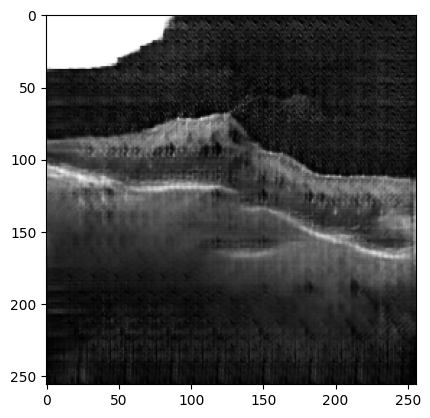

In [ ]:
fake = g_model.predict(generate_latent_points(100, 1))
plt.imshow(fake[0,:,:,0], cmap= "gray")

In [ ]:
test_DMEgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_DME = test_DMEgen.flow_from_directory(
    'OCT2017/test/DMED',
    target_size = (256,256),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

test_OTHERgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_OTHER = test_OTHERgen.flow_from_directory(
    'OCT2017/test/OTHER',
    target_size = (256,256),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

In [ ]:
predictDME   = c_model.predict(test_DME)
predictOTHER = c_model.predict(test_OTHER)

predictDME   = [np.argmax(i) for i in predictDME]
predictOTHER = [np.argmax(i) for i in predictOTHER]

In [ ]:
true_DME   = np.array([0] * 250)
true_OTHER = np.array([1] * 750)

In [ ]:
DMEmetrics = tf.keras.metrics.Accuracy()
DMEmetrics.update_state(true_DME, predictDME)
OTHERmetrics = tf.keras.metrics.Accuracy()
OTHERmetrics.update_state(true_OTHER, predictOTHER)
print(f"DME: {DMEmetrics.result().numpy()}, OTHER: {OTHERmetrics.result().numpy()}")

In [ ]:
d_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 128)     1280      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 activation_2 (Activation)   (None, 128, 128, 128)     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                       